# Smarter Circuits #

In [15]:
import numpy
import matplotlib.pyplot as plt
import cv2
import featureRecognition as fr
import boundingBox as bb
import math
from classes import Rect

## Load Image ##

In [16]:
def loadImage(path, name):
    image = cv2.imread('{path}/{name}'.format(path=path,name=name))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = 255 - image
    return numpy.asarray(image)

def thinnImage(image):
    image = cv2.ximgproc.thinning(image)
    return image

### Preprocess Image ###

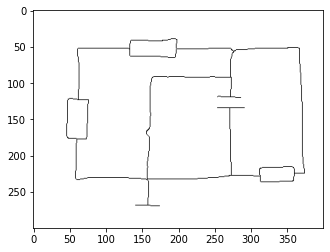

In [17]:
image = loadImage("./testImages","1.png")
image = cv2.resize(image, (400,300), interpolation = cv2.INTER_AREA)

#for y in range(0,len(image)):
#    for x in range(0, len(image[y])):
#        if image[y][x] > 110:
#            image[y][x] = 255
#        else:
#            image[y][x] = 0

#cv2.imwrite("out.png", 255 - image)

image = thinnImage(image)

plt.imshow(image, cmap=plt.cm.binary)

## Feature Recognition ##

In [18]:
(endPoints, intersections) = fr.getFeatures(image=image)

## Bounding Box Creation ##

In [19]:
def drawRect(image, rect):
    print(rect)
    startX = math.floor(rect.center.x - rect.radius)
    startY = math.floor(rect.center.y - rect.radius)

    endX = math.floor(rect.center.x + rect.radius)
    endY = math.floor(rect.center.y + rect.radius)
    print(endX)
    for x in range(startX,endX):
        #image[startY][x] = (0,255,0)
        #image[endY][x] = (0,255,0)
        image[x][startY] = (0,255,0)
        image[x][endY] = (0,255,0)

    for y in range(startY,endY):
        #image[y][startX] = (0,255,0)
        #image[y][endX] = (0,255,0)
        image[startX][y] = (0,255,0)
        image[endX][y] = (0,255,0)

    return image

In [20]:
boundingBoxes = bb.getBoundingBox(intersectionList=intersections, endPointList=endPoints)
#print(boundingBoxes)
for box in boundingBoxes:
    drawRect(image, box)

plt.imshow(image, cmap=plt.cm.binary)

Rect(center: (226.0,336.5),radius: 27)
253


ValueError: setting an array element with a sequence.